## Calculating Cohen Kappa score

In [ ]:
# Importing required libraries

import pandas as pd   # To work with the csv files by converting them to Dataframes
from sklearn.metrics import cohen_kappa_score, confusion_matrix  # inbuilt functions for calculating scores
from statsmodels.stats.inter_rater import fleiss_kappa
import numpy as np

In [ ]:
dataset_NLP_1 = pd.read_csv("Vansh_Annotations_NLP.csv")   # loading datasets
dataset_NLP_2 = pd.read_csv("Aditya_Annotations_NLP.csv")

df_CV_1 = pd.read_csv("Vansh_Annotations_CV.csv")
df_CV_2 = pd.read_csv("Aditya_Annotations_CV.csv")
df_CV_3 = pd.read_csv("Soham_Annotations_CV.csv")

In [ ]:
labels1 = dataset_NLP_1["ner_label"].tolist()    # List of 'ner_label' labels from the first annotator
labels2 = dataset_NLP_2["ner_label"].tolist()    # List of 'ner_label' labels from the second annotator

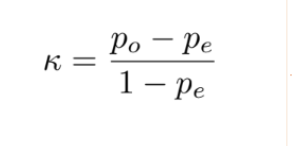

In [ ]:
cohen_kappa_inbuilt = cohen_kappa_score(labels1, labels2)   # using the cohen_kappa_score function
cohen_kappa_inbuilt

0.8952879581151832

## **Cohen's Kappa for NLP Dataset: 0.895**
  - A score of **0.895** shows **almost perfect agreement** between both of us teammates.
  - Both of us were highly consistent in our annotations for the NLP dataset.

# Calculating Fleiss Kappa


In [ ]:
merged = pd.merge(df_CV_1, df_CV_2, on = "annotation_id", suffixes = ("_ann1", "_ann2"))      # merging the datasets on annotator id
merged_new = pd.merge(merged, df_CV_3, on="annotation_id", suffixes=("","_ann3"))
merged_new = merged_new[["annotation_id", "classification_ann1", "classification_ann2", "classification"]]
merged_new["classification_ann3"] = merged_new["classification"]                              # classification done by all annotators
merged_new = merged_new.drop(columns=["classification"])
merged_new.head(3)

,annotation_id,classification_ann1,classification_ann2,classification_ann3
0,1,Trucks,Trucks,Trucks
1,2,Trucks,No Trucks,No Trucks
2,3,No Trucks,No Trucks,No Trucks


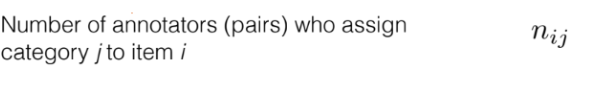






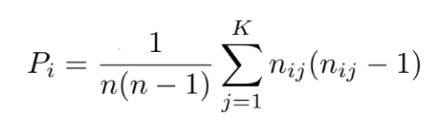

In [ ]:
N = 20  # no of items
k = 2   # no of classes
n = 3   # no of annotators

n_trucks = []             # to store the no of times the label was   "truck"   for each item
n_no_trucks = []          # to store the no of times the label was   "no-truck"    for each item

for index, row in merged_new.iterrows():

  count_trucks = sum([
        row["classification_ann1"] == "Trucks",
        row["classification_ann2"] == "Trucks",
        row["classification_ann3"] == "Trucks"
    ])
  n_trucks.append(count_trucks)

  count_no_trucks = sum([
        row["classification_ann1"] == "No Trucks",
        row["classification_ann2"] == "No Trucks",
        row["classification_ann3"] == "No Trucks"
    ])
  n_no_trucks.append(count_no_trucks)

In [ ]:
n_trucks, n_no_trucks

([3, 1, 0, 0, 0, 3, 0, 0, 2, 0, 0, 3, 2, 0, 2, 2, 0, 2, 0, 0],
 [0, 2, 3, 3, 3, 0, 3, 3, 1, 3, 3, 0, 1, 3, 1, 1, 3, 1, 3, 3])

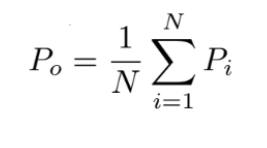



In [ ]:
# Calculating observed agreement (P_o) value

Prob_observed = 0
for i in range(N):
  Prob_observed += ( n_trucks[i] * (n_trucks[i] - 1) ) + ( n_no_trucks[i] * (n_no_trucks[i] - 1) )  # total observed
                                                                                                #probability taking 2 annotators at a time
Prob_observed = Prob_observed / (N*n*(n-1))
Prob_observed

0.8

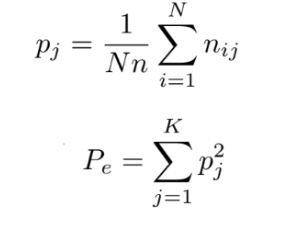

In [ ]:
# Calculating expected agreement (P_e)

Prob_trucks = 0
for i in range(N):
  Prob_trucks += n_trucks[i]

Prob_trucks = Prob_trucks / (N*n)            # Probability of choosing "trucks"


Prob_no_trucks = 0
for i in range(N):
  Prob_no_trucks += n_no_trucks[i]

Prob_no_trucks = Prob_no_trucks / (N*n)      # Probability of choosing "no-trucks"

Prob_trucks, Prob_no_trucks

(0.3333333333333333, 0.6666666666666666)

In [ ]:
Prob_expected = (Prob_trucks)**2 + (Prob_no_trucks)**2
Prob_expected                                             # final expected probability

0.5555555555555556

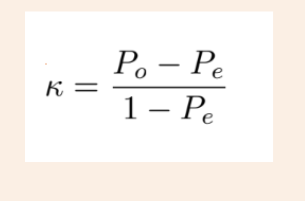

In [ ]:
Fleiss_Kappa_custom = (Prob_observed - Prob_expected) / (1 - Prob_expected)   # calculating fleiss kappa

# using inbuilt function from statsmodels

In [ ]:
contingency_table = np.zeros((N, 2), dtype=int)
for i in range(N):
    contingency_table[i, 0] = n_trucks[i]           # using inbuilt function to calculate fleiss kappa
    contingency_table[i, 1] = n_no_trucks[i]

fleiss_kappa_inbuilt = fleiss_kappa(contingency_table)

# comparing both methods

In [ ]:
fleiss_kappa_inbuilt, Fleiss_Kappa_custom        # comparing scores from both methods

(0.55, 0.55)

## **Fleiss Kappa for CV Dataset: 0.55**
  - We have taken Classification for the CV dataset from Soham Shrivastava (23110315) from Group 22.
  - A score of **0.55** falls into the **moderate agreement** range (between 0.41 and 0.60).
  - This shows some agreement between us three annotaters (Vansh, Aditya, and Soham), but there were inconsistencies also.
  - Differences in judgmentleeds to disagreements in classifying images as "Trucks" or "No Trucks."
